# Basic Operations example using TensorFlow library.
### tf.Graph represents a collection of tf.Operations. You can create operations by writing out equations. By default, there is a graph: tf.get_default_graph() and any new operations are added to this graph. The result of a tf.Operation is a tf.Tensor, which holds the values

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [3]:
# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)
print(result)

[-3.         -2.8064516  -2.612903   -2.419355   -2.2258065  -2.032258
 -1.8387097  -1.6451614  -1.451613   -1.2580645  -1.0645162  -0.87096786
 -0.6774194  -0.48387098 -0.29032278 -0.09677434  0.0967741   0.29032254
  0.48387098  0.6774192   0.8709676   1.0645161   1.2580643   1.451613
  1.6451612   1.8387094   2.032258    2.2258062   2.4193544   2.612903
  2.8064513   3.        ]


In [4]:
# %% We can setup an interactive session if we don't
# want to keep passing the session around:
sess.close()
sess = tf.InteractiveSession()

In [5]:
# %% Now this will work!
x.eval()

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.87096786, -0.6774194 , -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.6774192 ,
        0.8709676 ,  1.0645161 ,  1.2580643 ,  1.451613  ,  1.6451612 ,
        1.8387094 ,  2.032258  ,  2.2258062 ,  2.4193544 ,  2.612903  ,
        2.8064513 ,  3.        ], dtype=float32)

In [8]:
# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /(2.0 * tf.pow(sigma, 2.0)))) *(1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))


In [9]:
# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

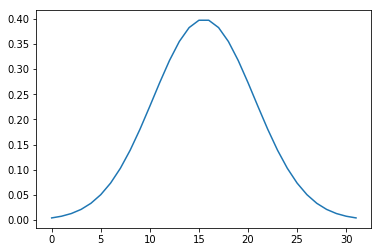

In [10]:
# %% Execute the graph and plot the result
plt.plot(z.eval())

In [12]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [15]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [16]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [17]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print ("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print ("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [18]:
# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

In [19]:
print(matrix1)

Tensor("Const:0", shape=(1, 2), dtype=float32)


In [20]:
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [21]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [22]:
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print (result)

[[12.]]


In [23]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

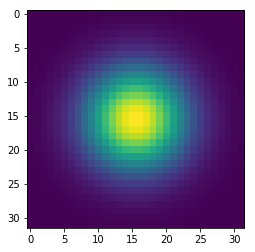

In [25]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())